In [1]:
# -*- coding: utf-8 -*-
"""
Reinforcement Learning (DQN) Tutorial
=====================================
**Author**: `Adam Paszke <https://github.com/apaszke>`_


This tutorial shows how to use PyTorch to train a Deep Q Learning (DQN) agent
on the CartPole-v0 task from the `OpenAI Gym <https://gym.openai.com/>`__.

**Task**

The agent has to decide between two actions - moving the cart left or
right - so that the pole attached to it stays upright. You can find an
official leaderboard with various algorithms and visualizations at the
`Gym website <https://gym.openai.com/envs/CartPole-v0>`__.

.. figure:: /_static/img/cartpole.gif
   :alt: cartpole

   cartpole

As the agent observes the current state of the environment and chooses
an action, the environment *transitions* to a new state, and also
returns a reward that indicates the consequences of the action. In this
task, rewards are +1 for every incremental timestep and the environment
terminates if the pole falls over too far or the cart moves more then 2.4
units away from center. This means better performing scenarios will run
for longer duration, accumulating larger return.

The CartPole task is designed so that the inputs to the agent are 4 real
values representing the environment state (position, velocity, etc.).
However, neural networks can solve the task purely by looking at the
scene, so we'll use a patch of the screen centered on the cart as an
input. Because of this, our results aren't directly comparable to the
ones from the official leaderboard - our task is much harder.
Unfortunately this does slow down the training, because we have to
render all the frames.

Strictly speaking, we will present the state as the difference between
the current screen patch and the previous one. This will allow the agent
to take the velocity of the pole into account from one image.

**Packages**


First, let's import needed packages. Firstly, we need
`gym <https://gym.openai.com/docs>`__ for the environment
(Install using `pip install gym`).
We'll also use the following from PyTorch:

-  neural networks (``torch.nn``)
-  optimization (``torch.optim``)
-  automatic differentiation (``torch.autograd``)
-  utilities for vision tasks (``torchvision`` - `a separate
   package <https://github.com/pytorch/vision>`__).

"""

import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
from einops import rearrange
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

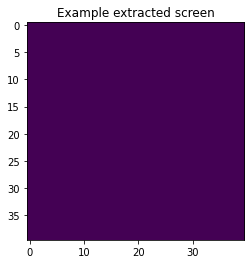

<ipython-input-2-58f36e5d8951>:182: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(tensor)
  0%|          | 0/50 [00:00<?, ?it/s]

action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])


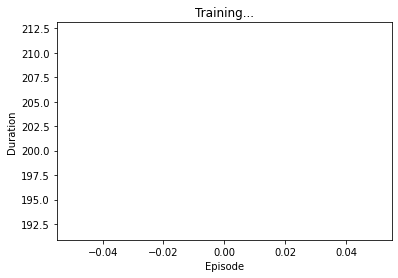

  2%|▏         | 1/50 [00:35<28:39, 35.09s/it]

action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])


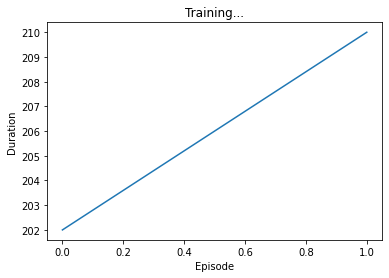

  4%|▍         | 2/50 [02:11<42:42, 53.38s/it]

action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])


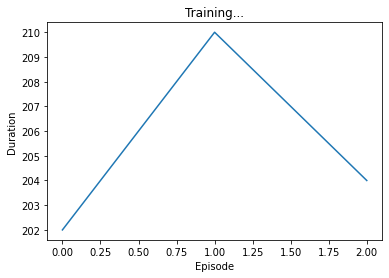

  6%|▌         | 3/50 [03:46<51:41, 65.99s/it]

action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])


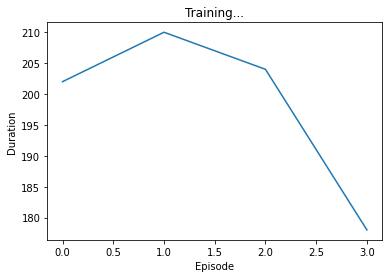

  8%|▊         | 4/50 [05:12<55:12, 72.02s/it]

action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])


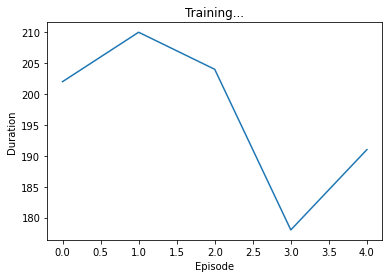

 10%|█         | 5/50 [06:47<59:07, 78.82s/it]

action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])
action_batch.shape
torch.Size([128, 1])


In [ ]:
env = gym.make('Breakout-v0') # .unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def step(env, *args):
    state, a, b, c = env.step(*args)
    state = convert_state(state)
    return state, a, b, c

def reset(env):
    return convert_state(env.reset())

def convert_state(state):
    import cv2
    return cv2.resize(cv2.cvtColor(state, cv2.COLOR_RGB2GRAY), (64, 64)) / 255.0


######################################################################
# Replay Memory
# -------------
#
# We'll be using experience replay memory for training our DQN. It stores
# the transitions that the agent observes, allowing us to reuse this data
# later. By sampling from it randomly, the transitions that build up a
# batch are decorrelated. It has been shown that this greatly stabilizes
# and improves the DQN training procedure.
#
# For this, we're going to need two classses:
#
# -  ``Transition`` - a named tuple representing a single transition in
#    our environment. It essentially maps (state, action) pairs
#    to their (next_state, reward) result, with the state being the
#    screen difference image as described later on.
# -  ``ReplayMemory`` - a cyclic buffer of bounded size that holds the
#    transitions observed recently. It also implements a ``.sample()``
#    method for selecting a random batch of transitions for training.
#

Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)


######################################################################
# Now, let's define our model. But first, let quickly recap what a DQN is.
#
# DQN algorithm
# -------------
#
# Our environment is deterministic, so all equations presented here are
# also formulated deterministically for the sake of simplicity. In the
# reinforcement learning literature, they would also contain expectations
# over stochastic transitions in the environment.
#
# Our aim will be to train a policy that tries to maximize the discounted,
# cumulative reward
# :math:`R_{t_0} = \sum_{t=t_0}^{\infty} \gamma^{t - t_0} r_t`, where
# :math:`R_{t_0}` is also known as the *return*. The discount,
# :math:`\gamma`, should be a constant between :math:`0` and :math:`1`
# that ensures the sum converges. It makes rewards from the uncertain far
# future less important for our agent than the ones in the near future
# that it can be fairly confident about.
#
# The main idea behind Q-learning is that if we had a function
# :math:`Q^*: State \times Action \rightarrow \mathbb{R}`, that could tell
# us what our return would be, if we were to take an action in a given
# state, then we could easily construct a policy that maximizes our
# rewards:
#
# .. math:: \pi^*(s) = \arg\!\max_a \ Q^*(s, a)
#
# However, we don't know everything about the world, so we don't have
# access to :math:`Q^*`. But, since neural networks are universal function
# approximators, we can simply create one and train it to resemble
# :math:`Q^*`.
#
# For our training update rule, we'll use a fact that every :math:`Q`
# function for some policy obeys the Bellman equation:
#
# .. math:: Q^{\pi}(s, a) = r + \gamma Q^{\pi}(s', \pi(s'))
#
# The difference between the two sides of the equality is known as the
# temporal difference error, :math:`\delta`:
#
# .. math:: \delta = Q(s, a) - (r + \gamma \max_a Q(s', a))
#
# To minimise this error, we will use the `Huber
# loss <https://en.wikipedia.org/wiki/Huber_loss>`__. The Huber loss acts
# like the mean squared error when the error is small, but like the mean
# absolute error when the error is large - this makes it more robust to
# outliers when the estimates of :math:`Q` are very noisy. We calculate
# this over a batch of transitions, :math:`B`, sampled from the replay
# memory:
#
# .. math::
#
#    \mathcal{L} = \frac{1}{|B|}\sum_{(s, a, s', r) \ \in \ B} \mathcal{L}(\delta)
#
# .. math::
#
#    \text{where} \quad \mathcal{L}(\delta) = \begin{cases}
#      \frac{1}{2}{\delta^2}  & \text{for } |\delta| \le 1, \\
#      |\delta| - \frac{1}{2} & \text{otherwise.}
#    \end{cases}
#
# Q-network
# ^^^^^^^^^
#
# Our model will be a convolutional neural network that takes in the
# difference between the current and previous screen patches. It has two
# outputs, representing :math:`Q(s, \mathrm{left})` and
# :math:`Q(s, \mathrm{right})` (where :math:`s` is the input to the
# network). In effect, the network is trying to predict the *expected return* of
# taking each action given the current input.
#

class DQN(nn.Module):

    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        '''
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)
        '''
        
        kernels = [8, 4, 3]
        strides = [4, 2, 1]
        
        self.conv1 = nn.Conv2d(4, 32, kernels[0], strides[0])  # RGB input channels.
        self.conv2 = nn.Conv2d(32, 64, kernels[1], strides[1])
        self.conv3 = nn.Conv2d(64, 64, kernels[2], strides[2])
        
        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w, kernels[0], strides[0]), kernels[1], strides[1]), kernels[2], strides[2])
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h, kernels[0], strides[0]), kernels[1], strides[1]), kernels[2], strides[2])
        linear_input_size = convw * convh * 64  # 32 is an arbitrary multiplier
        
        linear_output_size = int(linear_input_size / 2)
        
        self.dense = nn.Linear(linear_input_size, linear_output_size)
        self.head = nn.Linear(linear_output_size, outputs)
        
        for name, tensor in self.named_parameters():
            if 'weight' in name:
                nn.init.kaiming_normal(tensor)
            else:
                tensor.data.zero_()

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        # x = F.relu(self.bn1(self.conv1(x)))
        # x = F.relu(self.bn2(self.conv2(x)))
        # x = F.relu(self.bn3(self.conv3(x)))
        # return self.head(x.view(x.size(0), -1))  # (batch dim, hidden_size)
    
        # has no batch dim during flatten...
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        # x = x.view(1, -1)  # flatten
        x = x.view(x.size(0), -1)  # flatten with batch dim.  # TODO: confirm.
        x = F.relu(self.dense(x))
        return self.head(x)

    
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        # TODO: padding?
        self.conv1 = nn.Conv2d(4, 32, (8, 8), 4)  # n_frames=4 input channels.
        self.conv2 = nn.Conv2d(32, 64, (4, 4), 2)
        self.conv3 = nn.Conv2d(64, 64, (3, 3), 1)
        self.dense = nn.Linear(4*4*64, 512)
        self.out = nn.Linear(512, 18)
                
        torch.manual_seed(random_state())
                
        self.add_tensors = {}
        for name, tensor in self.named_parameters():
            if tensor.size() not in self.add_tensors:
                self.add_tensors[tensor.size()] = torch.Tensor(tensor.size())
            if 'weight' in name:
                nn.init.kaiming_normal(tensor)
            else:
                tensor.data.zero_()
                        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(1, -1)
        x = F.relu(self.dense(x))
        return self.out(x)
    
    

######################################################################
# Input extraction
# ^^^^^^^^^^^^^^^^
#
# The code below are utilities for extracting and processing rendered
# images from the environment. It uses the ``torchvision`` package, which
# makes it easy to compose image transforms. Once you run the cell it will
# display an example patch that it extracted.
#

resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor()])


def get_cart_location(screen_width):
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)  # MIDDLE OF CART

def get_screen():
    # Returned screen requested by gym is 400x600x3, but is sometimes larger
    # such as 800x1200x3. Transpose it into torch order (CHW).
    screen = env.render(mode='rgb_array') # was: .transpose((2, 0, 1))
    screen = convert_state(screen) # .transpose((2, 0, 1))
    # Cart is in the lower half, so strip off the top and bottom of the screen
    '''_, screen_height, screen_width = screen.shape
    screen = screen[:, int(screen_height*0.4):int(screen_height * 0.8)]
    view_width = int(screen_width * 0.6)
    cart_location = get_cart_location(screen_width)
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # Strip off the edges, so that we have a square image centered on a cart
    screen = screen[:, :, :]'''
    # Convert to float, rescale, convert to torch tensor
    # (this doesn't require a copy)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return resize(screen).unsqueeze(0).to(device)


reset(env)
plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title('Example extracted screen')
plt.show()


######################################################################
# Training
# --------
#
# Hyperparameters and utilities
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# This cell instantiates our model and its optimizer, and defines some
# utilities:
#
# -  ``select_action`` - will select an action accordingly to an epsilon
#    greedy policy. Simply put, we'll sometimes use our model for choosing
#    the action, and sometimes we'll just sample one uniformly. The
#    probability of choosing a random action will start at ``EPS_START``
#    and will decay exponentially towards ``EPS_END``. ``EPS_DECAY``
#    controls the rate of the decay.
# -  ``plot_durations`` - a helper for plotting the durations of episodes,
#    along with an average over the last 100 episodes (the measure used in
#    the official evaluations). The plot will be underneath the cell
#    containing the main training loop, and will update after every
#    episode.
#

BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

# Get screen size so that we can initialize layers correctly based on shape
# returned from AI gym. Typical dimensions at this point are close to 3x40x90
# which is the result of a clamped and down-scaled render buffer in get_screen()

init_screen = reset(env) # get_screen()
screen_height, screen_width = 64, 64 # init_screen.shape # TODO: convert_state(init_screen).shape

# Get number of actions from gym action space
n_actions = env.action_space.n

policy_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)


steps_done = 0


def select_action(cur_states):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            batch = rearrange(cur_states, 'c h w -> () c h w')
            return policy_net(batch).max(1)[1].view(1, 1)
            # TODO: don't understand / think this is wrong? should be argmax?
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)
        # assumes batch size 1?


episode_durations = []


def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001) # pause a bit so that plots are updated
    #if is_ipython:
    #    display.clear_output(wait=True)
    #    display.display(plt.gcf())


######################################################################
# Training loop
# ^^^^^^^^^^^^^
#
# Finally, the code for training our model.
#
# Here, you can find an ``optimize_model`` function that performs a
# single step of the optimization. It first samples a batch, concatenates
# all the tensors into a single one, computes :math:`Q(s_t, a_t)` and
# :math:`V(s_{t+1}) = \max_a Q(s_{t+1}, a)`, and combines them into our
# loss. By defition we set :math:`V(s) = 0` if :math:`s` is a terminal
# state. We also use a target network to compute :math:`V(s_{t+1})` for
# added stability. The target network has its weights kept frozen most of
# the time, but is updated with the policy network's weights every so often.
# This is usually a set number of steps but we shall use episodes for
# simplicity.
#

def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s[-1] is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.stack([torch.tensor(s, dtype=torch.float) for s in batch.next_state
                                                if s[-1] is not None])
    state_batch = torch.stack([torch.tensor(s, dtype=torch.float) for s in batch.state])
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)
    
    print('action_batch.shape')
    print(action_batch.shape)
    # state_batch = rearrange(state_batch_, 'c h w -> () c h w')

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()


######################################################################
#
# Below, you can find the main training loop. At the beginning we reset
# the environment and initialize the ``state`` Tensor. Then, we sample
# an action, execute it, observe the next screen and the reward (always
# 1), and optimize our model once. When the episode ends (our model
# fails), we restart the loop.
#
# Below, `num_episodes` is set small. You should download
# the notebook and run lot more epsiodes, such as 300+ for meaningful
# duration improvements.
#

num_episodes = 50
for i_episode in tqdm(range(num_episodes)):
    # Initialize the environment and state
    
    cur_states = [reset(env)] * 4
    
    for t in count():
        # Select and perform an action
        action = select_action(torch.tensor(cur_states, dtype=torch.float, device=device))
        new_state, reward, done, _ = step(env, action.item())
        reward = torch.tensor([reward], device=device)

        if done:
            new_state = None
        
        next_cur_states = cur_states[1:] + [new_state]
            
        # Store the transition in memory
        memory.push(cur_states,
                    action,
                    next_cur_states,
                    reward)

        # Move to the next state
        cur_states = next_cur_states

        # Perform one step of the optimization (on the target network)
        optimize_model()
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break
    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('Complete')
env.render()
env.close()
plt.ioff()
plt.show()

######################################################################
# Here is the diagram that illustrates the overall resulting data flow.
#
# .. figure:: /_static/img/reinforcement_learning_diagram.jpg
#
# Actions are chosen either randomly or based on a policy, getting the next
# step sample from the gym environment. We record the results in the
# replay memory and also run optimization step on every iteration.
# Optimization picks a random batch from the replay memory to do training of the
# new policy. "Older" target_net is also used in optimization to compute the
# expected Q values; it is updated occasionally to keep it current.
#


In [ ]:
t = torch.tensor([[1, 2], [3, 4]])
idx = torch.tensor([[0], [0]])
t.gather(1, idx)

In [ ]:
%debug

In [ ]:
a = np.array([[1, 2, 3, 4, 3, 2, 1]])
a.max(1)[0]

'''import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0')
env.reset()
#print('env.action_space')
#print(env.action_space)
#print(env.action_space.n)
#print(type(env.action_space))
for i in range(100):
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if i < 5:
        action = 1
    elif i < 20:
        action = 0
    elif i < 40:
        action = 2
    elif i < 60:
        action = 3
    elif i < 80:
        action = 2
    else:
        action = 3
    # action = env.action_space.sample()
    env.step(action)'''

In [ ]:
env = gym.make('Breakout-v0')
state = env.reset()
state.shape

In [ ]:
[[random.randrange(4)]]